In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

2025-12-08 23:37:57.222660: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-08 23:37:57.984686: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-08 23:38:00.235823: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Reading data from source
df = pd.read_csv(r'/home/aryan/playground/Duplicate Question Detection/data/questions.csv')

In [3]:
df.head(5)

,"id""",qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
# Shape of the data
df.shape

(404351, 6)

In [5]:
# Checking for null values
df.isna().sum()

id"             0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# Dropping null values because its just 3 null values so dropping them is safe
df.dropna(inplace=True)

In [7]:
# Checking for null values
df.duplicated().sum()

np.int64(0)

In [8]:
# Dropping irrelevant columns
df.drop(['id"', 'qid1', 'qid2'], axis=1, inplace=True)

In [9]:
df.head(5)

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# Text Preprocessing

In [10]:
import contractions
import unicodedata
import nltk
import string
import re
import emoji

In [11]:
# Lower casing the text
df['question1_preprocessed'] = df['question1'].str.lower()
df['question2_preprocessed'] = df['question2'].str.lower()

In [12]:
# Removing http links from the text
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Apply the function to each text entry
df['question1_preprocessed'] = df['question1_preprocessed'].apply(remove_urls)
df['question2_preprocessed'] = df['question2_preprocessed'].apply(remove_urls)

During the exploratory analysis of our dataset, we observed that very less around 0.05% text entries contain URLs (e.g., https://t.co/...). These links are very important in differentiating question1 from question2 but since they are almost close to negligible so we are removing it.

In [13]:
# Expanding Contractions
df['question1_preprocessed'] = df['question1_preprocessed'].apply(lambda x: contractions.fix(x))
df['question2_preprocessed'] = df['question2_preprocessed'].apply(lambda x: contractions.fix(x))

In [14]:
# Removing Accents/Diacritics
def remove_accents_diacritics(text):
    """
    Normalize unicode text and remove accents/diacritics.
    Example: 'café' → 'cafe'
    """
    # Normalize to 'NFKD' form (decomposes accents)
    text = unicodedata.normalize('NFKD', text)
    # Keep only base characters (ignore diacritics)
    text = ''.join([c for c in text if not unicodedata.combining(c)])
    return text

df['question1_preprocessed'] = df['question1_preprocessed'].apply(remove_accents_diacritics)
df['question2_preprocessed'] = df['question2_preprocessed'].apply(remove_accents_diacritics)

In [15]:
# Convert emojis to text descriptions
def convert_emojis(text):
    return emoji.demojize(text)

df['question1_preprocessed'] = df['question1_preprocessed'].apply(convert_emojis)
df['question2_preprocessed'] = df['question2_preprocessed'].apply(convert_emojis)

In [16]:
# Removing punctuations from the text
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['question1_preprocessed'] = df['question1_preprocessed'].apply(remove_punctuation)
df['question2_preprocessed'] = df['question2_preprocessed'].apply(remove_punctuation)

In [ ]:
# Converting Raw text into Tokens
from nltk.tokenize import word_tokenize
df['question1_preprocessed'] = df['question1_preprocessed'].apply(lambda x: word_tokenize(x))
df['question2_preprocessed'] = df['question2_preprocessed'].apply(lambda x: word_tokenize(x))

In [ ]:
# Lemmetization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

df['question1_preprocessed'] = df['question1_preprocessed'].apply(lemmatize_words)
df['question2_preprocessed'] = df['question2_preprocessed'].apply(lemmatize_words)

In [ ]:
df.head(5)

,question1,question2,is_duplicate,question1_preprocessed,question2_preprocessed
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv..."
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm..."
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,..."
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,..."
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]"


In [ ]:
labels = df['is_duplicate']

# Text Representation

In [ ]:
import gensim.downloader as api
print(api.info()['models'].keys())

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


In [ ]:
glove_model = api.load('glove-twitter-200')

In [ ]:
from keras.layers import TextVectorization, Embedding

vectorizer = TextVectorization(
    max_tokens = 20_000,
    output_mode='int',
    output_sequence_length=30
)

In [ ]:
all_questions = df["question1_preprocessed"].tolist() + df["question2_preprocessed"].tolist()
all_questions = [str(q) for q in all_questions]

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(all_questions).batch(512)
vectorizer.adapt(dataset)

In [ ]:
df['question1_preprocessed'] = df['question1_preprocessed'].apply(lambda x: " ".join(x))
df['question2_preprocessed'] = df['question2_preprocessed'].apply(lambda x: " ".join(x))

In [ ]:
question1_txt = df['question1_preprocessed'].values
question2_txt = df['question2_preprocessed'].values

In [ ]:
embedding_dim = glove_model.vector_size
vocab_size = vectorizer.vocabulary_size()
embedding_matrix = np.zeros(shape=(vocab_size, embedding_dim))
vocab = vectorizer.get_vocabulary()

for idx, word in enumerate(vocab):
    if word in glove_model:
        embedding_matrix[idx] = glove_model[word]
    else:
        embedding_matrix[idx] = np.random.normal(scale=0.6, size=(embedding_dim,))

In [ ]:
# These are the dense vectors of each word taken from pretrained glove model each word is represented with 200 dense vectors
embedding_matrix

array([[ 0.77272921,  0.04289017, -0.4333289 , ...,  0.52244707,
        -0.24825144, -0.24717183],
       [-0.05141835, -0.27206661,  0.4959606 , ..., -0.24412119,
        -0.1583146 ,  0.26502999],
       [ 0.63612002, -0.92817998,  0.86654001, ..., -0.21005   ,
         0.4693    ,  0.23855001],
       ...,
       [-0.35763001,  0.047291  , -0.22136   , ...,  0.055012  ,
         0.30236   , -0.40316999],
       [-1.05400084, -0.09896561,  0.09824049, ..., -0.44829937,
         0.69641664,  0.21878344],
       [-1.32620077,  0.55578517, -0.23400098, ..., -0.39698048,
         1.08759862,  0.31069498]], shape=(1086, 200))

In [ ]:
from keras.layers import Embedding
import keras

embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True
)

# Using special siamese lstm model for text similarity

In [ ]:
from keras.layers import Input, Bidirectional, GRU, GlobalMaxPooling1D, Dense, Dropout, Lambda
from keras.models import Model

In [ ]:
# RAW TEXT inputs
q1_input = Input(shape=(), dtype=tf.string)
q2_input = Input(shape=(), dtype=tf.string)

# Vectorizer INSIDE the model
q1_int = vectorizer(q1_input)
q2_int = vectorizer(q2_input)

# Shared encoder (embedding + LSTM + pooling)
max_len = 30
encoder_input = Input(shape=(max_len,), dtype='int32')

x = embedding_layer(encoder_input)
x = Bidirectional(GRU(64, return_sequences=True, use_cudnn=False))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

encoder = Model(encoder_input, x)

# Encode both questions
q1_vec = encoder(q1_int)
q2_vec = encoder(q2_int)

# Manhattan similarity
def manhattan_distance(vects):
    q1, q2 = vects
    return tf.exp(-tf.reduce_sum(tf.abs(q1 - q2), axis=1, keepdims=True))

similarity = Lambda(manhattan_distance)([q1_vec, q2_vec])

# Final model
siamese_model = Model([q1_input, q2_input], similarity)

siamese_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
siamese_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization… │ (None, 30)        │          0 │ input_layer_12[0… │
│ (TextVectorization) │                   │            │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_8        │ (None, 128)       │    335,856 │ text_vectorizati… │
│ (Functional)        │                   │            │ text_vectorizati… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 1)         │          0 │ functional_8[0][… │
│                     │                   │            │ functional_8[1][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 335,856 (1.28 MB)

 Trainable params: 118,656 (463.50 KB)

 Non-trainable params: 217,200 (848.44 KB)

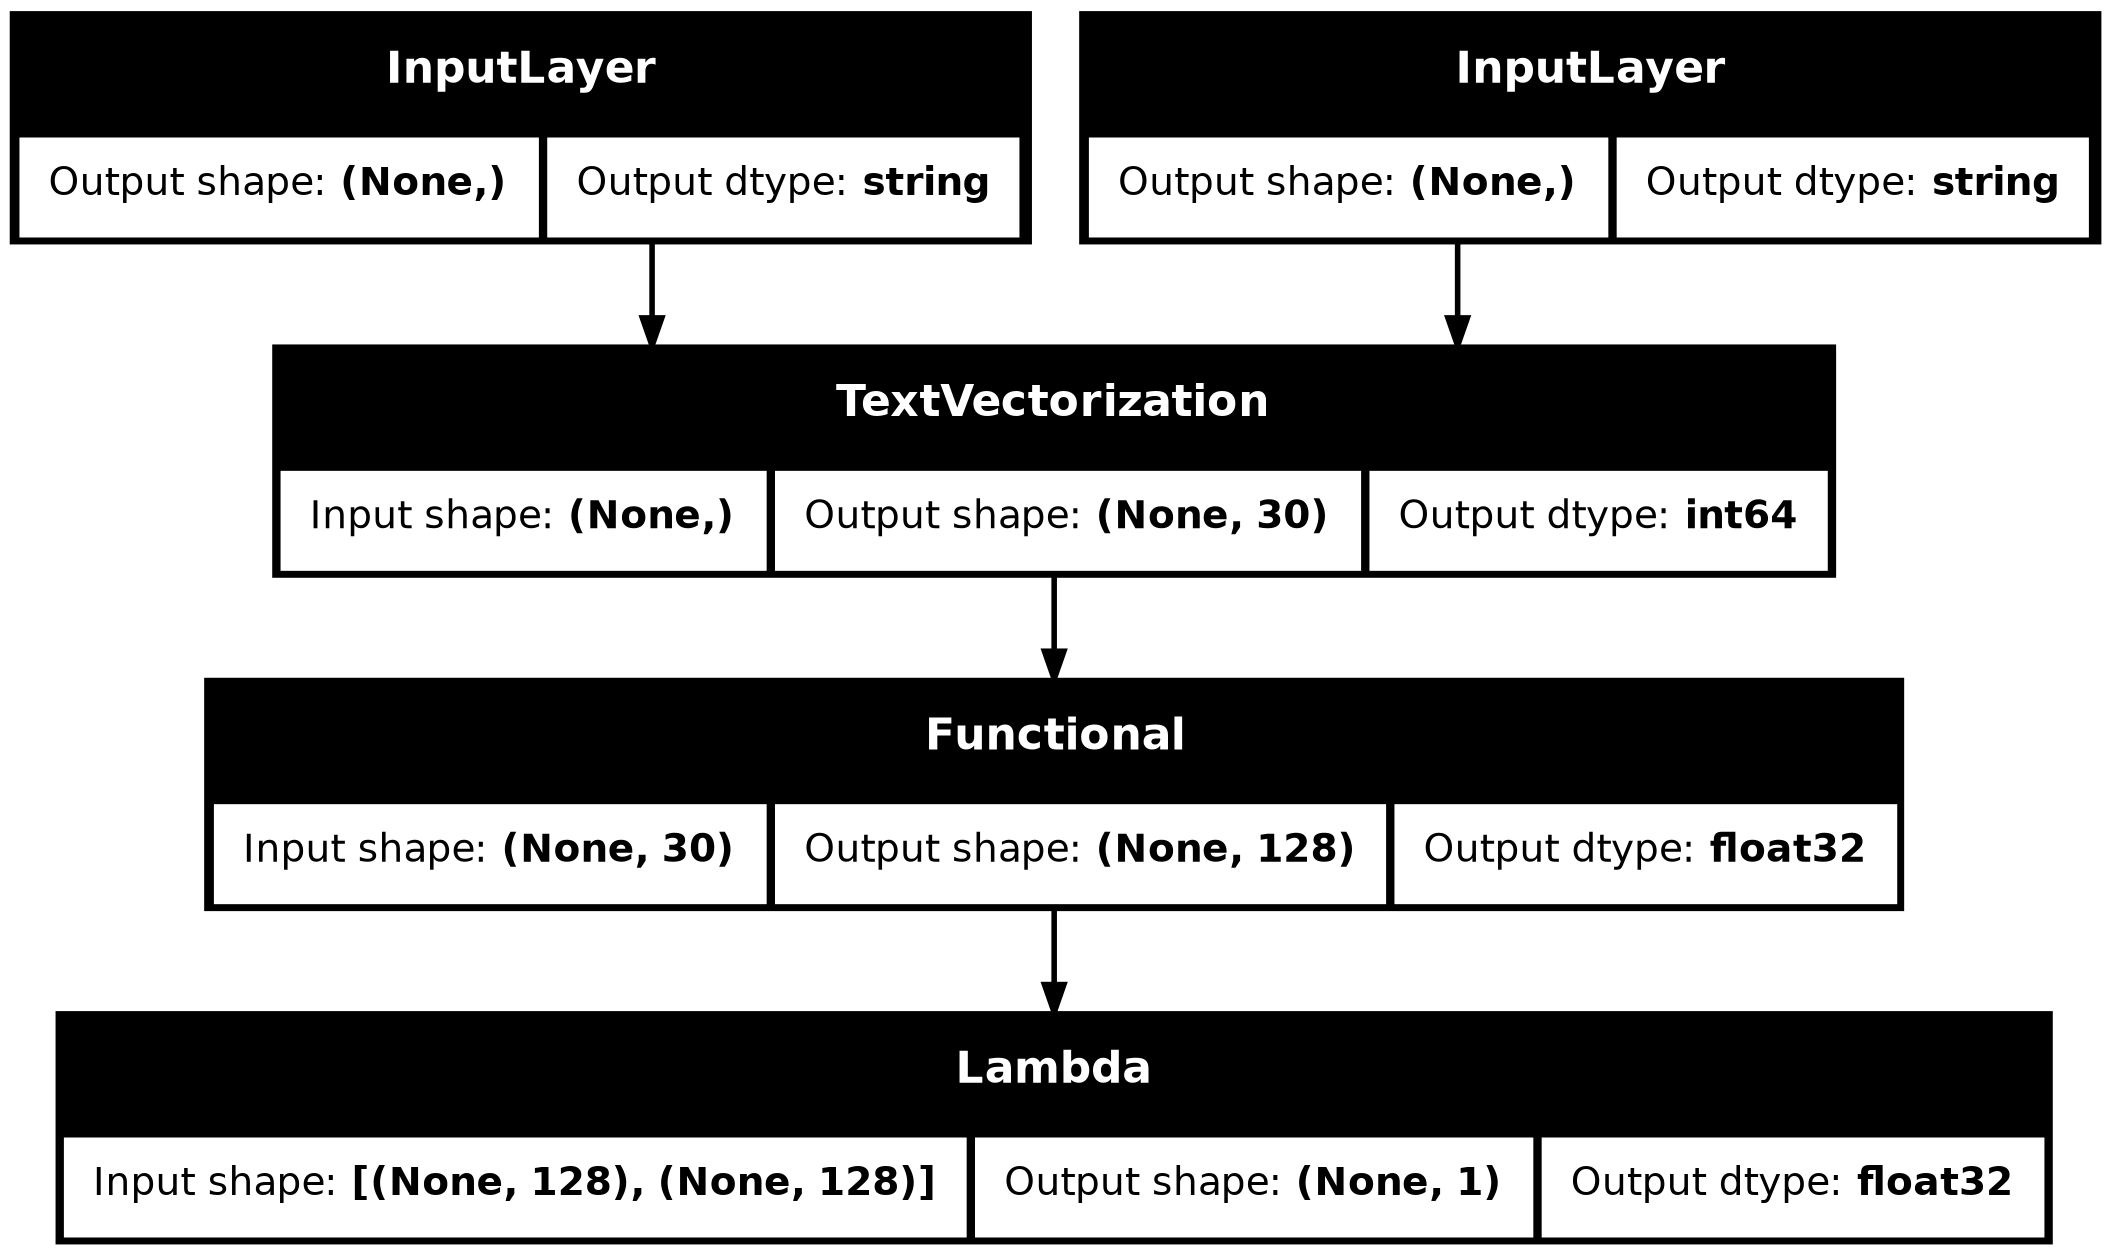

In [ ]:
from keras.utils import plot_model
plot_model(siamese_model, show_dtype=True, show_shapes=True)

In [ ]:
siamese_model.fit(
    [question1_txt, question2_txt],
    labels,
    batch_size=128,
    epochs=5,
    validation_split=0.3
)

Epoch 1/5
 101/2212 ━━━━━━━━━━━━━━━━━━━━ 1:08 32ms/step - accuracy: 0.6177 - loss: 1.1401

InvalidArgumentError: Graph execution error:

Detected at node functional_9_1/functional_8_1/bidirectional_4_1/forward_gru_1/Assert/Assert defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/aryan/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/aryan/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/aryan/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/aryan/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/aryan/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/aryan/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/aryan/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 397, in dispatch_shell

  File "/home/aryan/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 368, in execute_request

  File "/home/aryan/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 752, in execute_request

  File "/home/aryan/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 455, in do_execute

  File "/home/aryan/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 577, in run_cell

  File "/home/aryan/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3116, in run_cell

  File "/home/aryan/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3171, in _run_cell

  File "/home/aryan/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/aryan/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3394, in run_cell_async

  File "/home/aryan/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3639, in run_ast_nodes

  File "/home/aryan/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3699, in run_code

  File "/tmp/ipykernel_10132/3495637820.py", line 1, in <module>

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 399, in fit

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 241, in function

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 154, in multi_step_on_iterator

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 125, in wrapper

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 134, in one_step_on_data

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 59, in train_step

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/models/functional.py", line 183, in call

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/ops/function.py", line 206, in _run_through_graph

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/models/functional.py", line 644, in call

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/models/functional.py", line 183, in call

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/ops/function.py", line 206, in _run_through_graph

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/models/functional.py", line 644, in call

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py", line 222, in call

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/layers/rnn/gru.py", line 601, in call

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py", line 425, in call

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/layers/rnn/gru.py", line 568, in inner_loop

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/backend/tensorflow/rnn.py", line 484, in gru

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/backend/tensorflow/rnn.py", line 682, in _cudnn_gru

  File "/home/aryan/miniconda3/envs/quora/lib/python3.11/site-packages/keras/src/backend/tensorflow/rnn.py", line 557, in _assert_valid_mask

assertion failed: [You are passing a RNN mask that does not correspond to right-padded sequences, while using cuDNN, which is not supported. With cuDNN, RNN masks can only be used for right-padding, e.g. `[[True, True, False, False]]` would be a valid mask, but any mask that isn\'t just contiguous `True`\'s on the left and contiguous `False`\'s on the right would be invalid. You can pass `use_cudnn=False` to your RNN layer to stop using cuDNN (this may be slower).]
	 [[{{node functional_9_1/functional_8_1/bidirectional_4_1/forward_gru_1/Assert/Assert}}]] [Op:__inference_multi_step_on_iterator_281508]